In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\loan prediction Dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

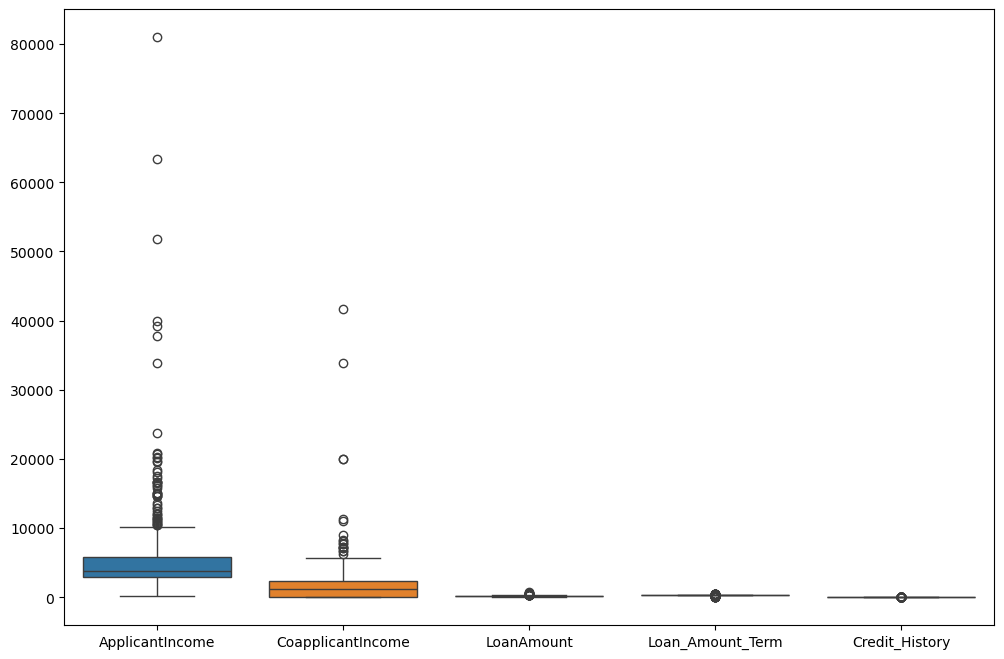

In [8]:
# checking for outliers values 
plt.figure(figsize=(12,8)) # box plot is used for checking outliers outliers indicates deviation between values
sns.boxplot(data = df)  # if outliers are present then median values are used to fill null like here in applicant income

In [9]:
 #filling null numerical datatypes 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median()) #Loan Amouny have much outliers so median is used
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) #Loan_Amount_Term dont have outliers
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())



In [10]:
#filling null object data types
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])   #mode is used for object data type
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [11]:
df.isnull().sum() #checking null values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

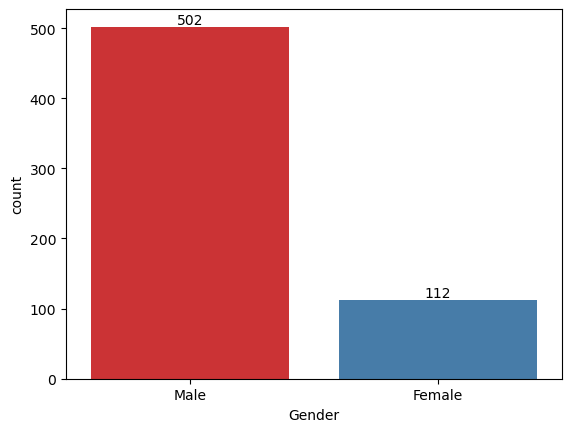

In [12]:
loan_Gender = df['Gender'].value_counts()
ax = sns.countplot(data=df, x='Gender',palette='Set1')
for bars in ax.containers:
    ax.bar_label(bars)
    

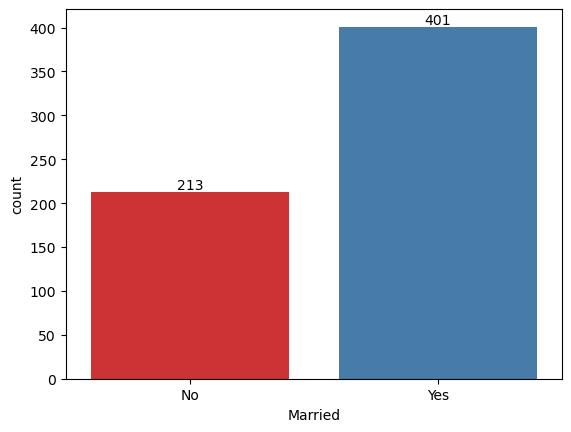

In [13]:
loan_marital_status =  df['Married'].value_counts()
ax = sns.countplot(data=df, x='Married',palette='Set1')
for bars in ax.containers:
    ax.bar_label(bars)

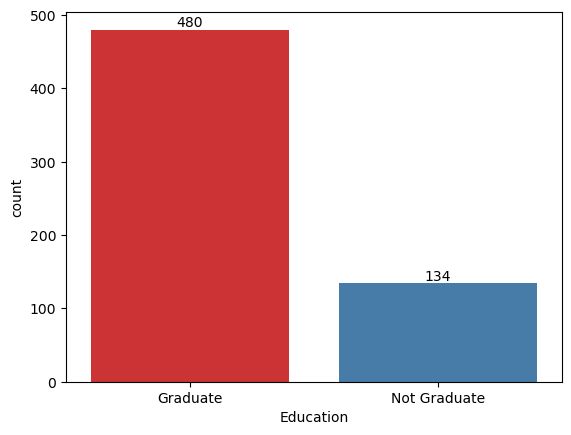

In [14]:
loan_eduaction =  df['Education'].value_counts()
ax = sns.countplot(data=df, x='Education',palette='Set1')
for bars in ax.containers:
    ax.bar_label(bars)

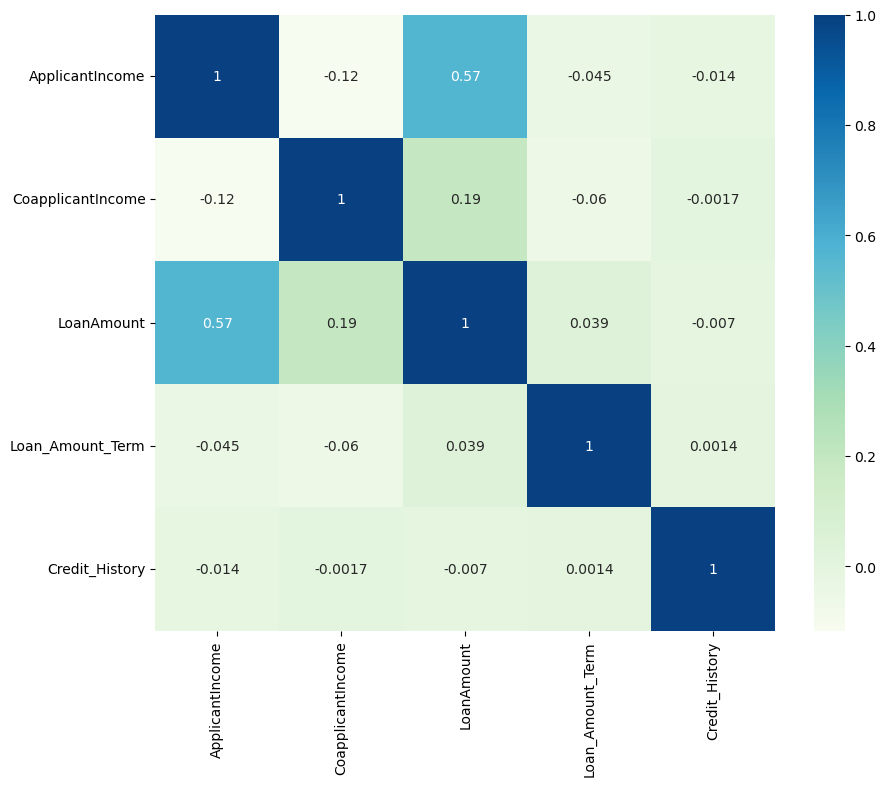

In [15]:
# correlating various variables

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlating various variables
corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='GnBu')
plt.show()




In [16]:
#dropping coapplicant income by adding coapplicant income with applicat income as total income
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

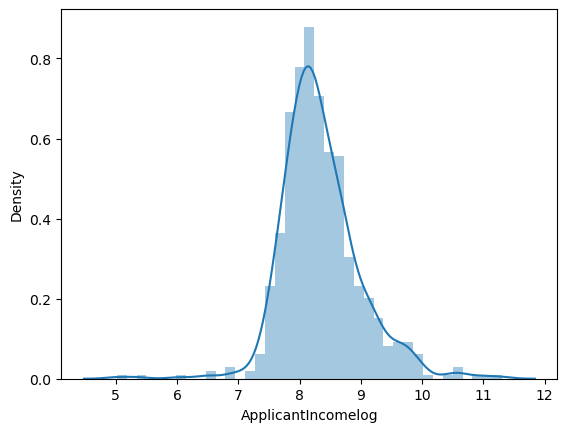

In [17]:
#applying log transformation for ease of visualization
df['ApplicantIncomelog'] =np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

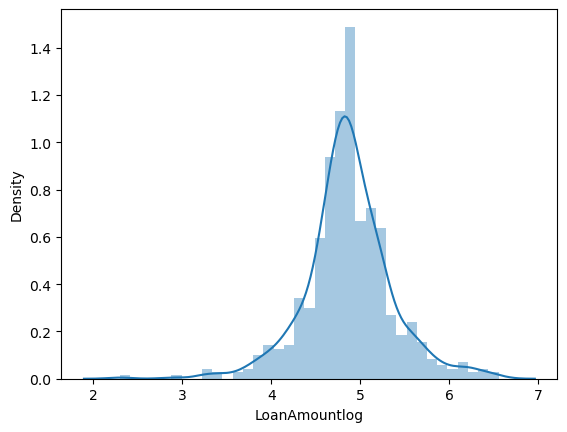

In [18]:
 #applying log transformation for ease of visualization
df['LoanAmountlog'] =np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Termlog', ylabel='Density'>

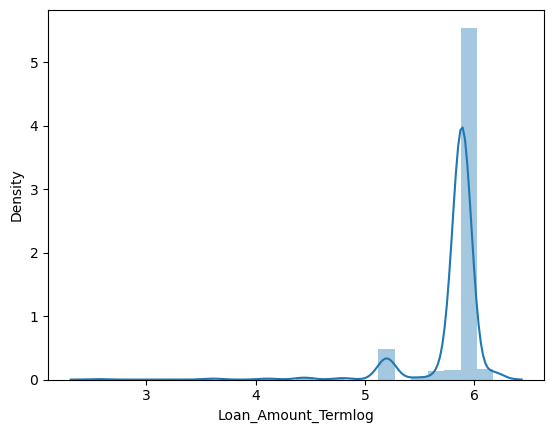

In [19]:
 #applying log transformation for ease of visualization
df['Loan_Amount_Termlog'] =np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Termlog'])

<Axes: xlabel='total_income_log', ylabel='Density'>

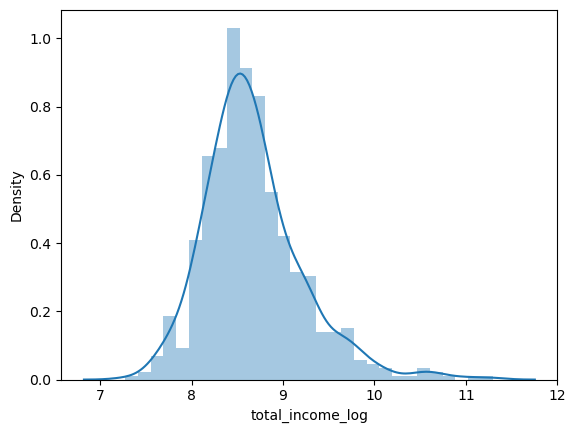

In [20]:
 #applying log transformation for ease of visualization
df['total_income_log'] =np.log(df['total_income']+1)
sns.distplot(df['total_income_log'])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [22]:
#dropping unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','total_income','Loan_ID']
df = df.drop(columns = cols, axis = 1 , errors='ignore')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [23]:
#encoding is to be done for converting data into numerical data 
# label encoding is used when we have only 2 values like male and female or educated and uneducated 
# and one hot encoding: more than 2 values such as  states in india
from sklearn.preprocessing import LabelEncoder
cols =['Gender','Married','Dependents','Self_Employed','Property_Area','Education','Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
    

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [25]:
df.dtypes

Gender                   int32
Married                  int32
Dependents               int32
Education                int32
Self_Employed            int32
Credit_History         float64
Property_Area            int32
Loan_Status              int32
ApplicantIncomelog     float64
LoanAmountlog          float64
Loan_Amount_Termlog    float64
total_income_log       float64
dtype: object

In [26]:
# creating independent variables splitting depedent and independent features
x= df.drop(columns = ['Loan_Status'],axis =1 )
y = df['Loan_Status']
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [27]:
#creating machine learning model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
## logistics regression model
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_predict_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_predict_model1)

In [30]:
accuracy*100 #in percentage

77.27272727272727

In [31]:
#accuracy : ratio of the correctly predicted values to the total values
score = cross_val_score(model1,x,y,cv = 5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [32]:
np.mean(score)*100 #in percent

80.9462881514061

In [33]:
#decision tree classifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_predict_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_predict_model2, y_test)
print('the accuracy score decision tree model is :' , accuracy*100)

the accuracy score decision tree model is : 74.02597402597402


In [34]:
 score = cross_val_score(model2,x,y,cv = 5)
print('the cross validation score of decision tree is :',np.mean(score)*100)

the cross validation score of decision tree is : 69.5428495268559


In [35]:
# random classifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_predict_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_predict_model3, y_test)
print('the accuracy score random forest model is :' , accuracy*100)

the accuracy score random forest model is : 77.27272727272727


In [36]:
##KNieghbour model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_predict_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_predict_model4, y_test)
print('the accuracy score KNeighbors model is :' , accuracy*100)

the accuracy score KNeighbors model is : 71.42857142857143


In [37]:
score = cross_val_score(model4,x,y,cv = 5)
print('Cross validation score of KNearest:',np.mean(score)*100)

Cross validation score of KNearest: 73.61721977875517


In [38]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_predict):
    report = classification_report(y_test,y_predict)
    print(f'Classification Report for{model_name}:\n{report}\n')

generate_classification_report(model1,y_test,y_predict_model1)
generate_classification_report(model2,y_test,y_predict_model2)
generate_classification_report(model3,y_test,y_predict_model3)
generate_classification_report(model4,y_test,y_predict_model4)

Classification Report forLogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report forDecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.65      0.57      0.61        54
           1       0.78      0.83      0.81       100

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154


Classification Report forRandomForestClassifier():
              precision    recall  f1-score   support

           0       0.85      0.43      0.57        54
           1       0.76      0.96      0.85       100

    accuracy                   

In [39]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
oversample = RandomOverSampler(random_state=42)
x_resampled,y_resampled = oversample.fit_resample(x,y)

df_resampled = pd.concat([pd.DataFrame(x_resampled,columns=x.columns),pd.Series(y_resampled,name='Loan_Status')],axis=1)

In [42]:
x_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_income_log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [43]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [44]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(x_resampled, y_resampled, test_size = 0.25, random_state=42)

In [45]:
## logistics regression model
model1 = LogisticRegression()
model1.fit(x_resampled_train, y_resampled_train)  # Use y_resampled_train as the target
y_predict_model1 = model1.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_predict_model1)
accuracy*100

69.19431279620854

In [46]:
#decision tree classifier
model2 = DecisionTreeClassifier()
model2.fit(x_resampled_train,y_resampled_train)
y_predict_model2 = model2.predict(x_resampled_test)
accuracy = accuracy_score(y_predict_model2, y_resampled_test)
print('the accuracy score decision tree model is :' , accuracy*100)

the accuracy score decision tree model is : 77.72511848341233


In [47]:
model3 = RandomForestClassifier()
model3.fit(x_resampled_train,y_resampled_train)
y_predict_model3 = model3.predict(x_resampled_test)
accuracy = accuracy_score(y_predict_model3, y_resampled_test)
print('the accuracy score random forest model is :' , accuracy*100)

the accuracy score random forest model is : 88.15165876777252


In [48]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_resampled_train,y_resampled_train)
y_predict_model4 = model4.predict(x_resampled_test)
accuracy = accuracy_score(y_predict_model4, y_resampled_test)
print('the accuracy score KNeighbors model is :' , accuracy*100)

the accuracy score KNeighbors model is : 72.51184834123224


In [49]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_predict):
    report = classification_report(y_test,y_predict)
    print(f'Classification Report for{model_name}:\n{report}\n')

generate_classification_report(model1,y_resampled_test,y_predict_model1)
generate_classification_report(model2,y_resampled_test,y_predict_model2)
generate_classification_report(model3,y_resampled_test,y_predict_model3)
generate_classification_report(model4,y_resampled_test,y_predict_model4)

Classification Report forLogisticRegression():
              precision    recall  f1-score   support

           0       0.84      0.54      0.65       114
           1       0.62      0.88      0.72        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.73      0.69      0.69       211


Classification Report forDecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       114
           1       0.80      0.68      0.74        97

    accuracy                           0.78       211
   macro avg       0.78      0.77      0.77       211
weighted avg       0.78      0.78      0.77       211


Classification Report forRandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.91      0.88        97

    accuracy                   